In [3]:
import csv
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('final_data.csv')


In [5]:
df=df.dropna()
df=df.set_index(['Unnamed: 0'])

In [6]:
df['follower_count']=df['follower_count']/1000000


In [7]:
df['Positive']=df['Positive']*1000
df['Negative']=df['Negative']*1000
df['Anticipation']=df['Anticipation']*1000
df['Disgust']=df['Disgust']*1000
df['Fear']=df['Fear']*1000
df['Joy']=df['Joy']*1000
df['Sadness']=df['Sadness']*1000
df['Surprise']=df['Surprise']*1000
df['Trust']=df['Trust']*1000

In [8]:
pd.options.display.max_columns=11
df.describe()

,Anticipation,Disgust,Fear,Joy,Negative,Positive,Sadness,Surprise,Trust,follower_count,Pct_change
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,10.488975,1.702832,4.964858,4.616569,9.353808,13.891621,3.940987,3.652298,9.813697,14.140550,-0.001188
std,3.206982,1.016819,2.088546,1.988888,3.197049,4.711806,1.887132,1.503773,3.778724,22.197178,0.014607
min,1.800180,0.000000,0.900090,0.000000,4.004577,4.500450,0.000000,0.000000,2.700270,0.212332,-0.076124
25%,8.661417,1.003512,3.613207,3.364279,6.974128,11.125802,2.595839,2.631579,7.580274,4.112753,-0.008042
50%,10.335917,1.578947,4.850309,4.529136,8.902541,13.502898,3.627570,3.500583,9.493964,7.756158,-0.000095
75%,12.350371,2.104458,6.048048,5.504010,11.071289,16.488072,4.822561,4.508373,11.059934,17.318253,0.007565
max,22.809998,5.452320,14.874915,10.998945,20.607858,36.200405,10.229800,10.546934,33.593976,181.115430,0.026556


In [9]:
#here is a brief description of the dataset after scaling and adjusting for the parameters

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2016-06-15 to 2016-03-30
Data columns (total 11 columns):
Anticipation      101 non-null float64
Disgust           101 non-null float64
Fear              101 non-null float64
Joy               101 non-null float64
Negative          101 non-null float64
Positive          101 non-null float64
Sadness           101 non-null float64
Surprise          101 non-null float64
Trust             101 non-null float64
follower_count    101 non-null float64
Pct_change        101 non-null float64
dtypes: float64(11)
memory usage: 9.5+ KB


In [11]:
df['tagged']=np.where(df['Pct_change']<0,0,1)
len(df)

101

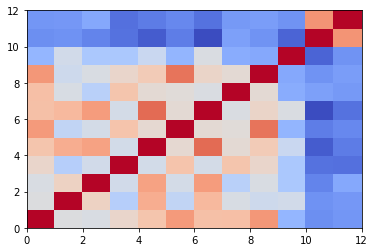

In [12]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') 
plot.show()

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:10]
y_train = train['tagged']
x_test = test.iloc[0:,0:10]
y_test = test['tagged']

In [14]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
testing_predictions  = model.predict(x_test)
print(testing_predictions)

[0.44496859 0.22266407 0.0930235  0.58085681 0.25512408 0.4034017
 0.44219937 0.52814385 0.52132777 0.95655668 0.49881422 1.02518449
 0.6429702  0.49301831 0.31670924 0.1145961  1.01625904 0.37743897
 0.51813825 0.38037216 0.38499171 0.06577854 0.60490435 0.80067344
 0.47846994 0.84971147 0.08584567 0.72874031 0.56790271 0.56687237
 0.1432672 ]


In [16]:
for i in range(len(testing_predictions)):
    print(testing_predictions[i],y_train[i])

0.4449685902718831 1
0.22266406705554834 0
0.09302350381560459 0
0.580856814388074 0
0.2551240772932153 0
0.4034016970240661 0
0.4421993667337927 0
0.5281438471587578 0
0.521327770758969 0
0.9565566782528712 1
0.49881421987371033 1
1.025184489630204 0
0.6429701984718446 1
0.4930183062402549 0
0.31670923635926507 0
0.11459609564373083 0
1.0162590429328497 1
0.3774389739616767 0
0.5181382530347913 0
0.38037215990397194 0
0.38499170684512124 0
0.0657785366726105 0
0.6049043479539875 1
0.8006734380839198 1
0.4784699405691457 1
0.8497114725178772 0
0.08584566762930393 1
0.7287403105041381 0
0.5679027133766468 0
0.5668723725207714 0
0.1432672017243345 0


In [17]:

def get_classification(predictions,threshold):
    classes = np.zeros_like(testing_predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes


In [18]:
get_classification(testing_predictions,0.7)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])